In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import community
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import label_propagation_communities
import collections

<center> <h1> Comparison between the pre-network and the post-network </h1></center>

## Networks generated by WGCNA:
1. __pre:__ '../data/RectumMicrobiome_PrePost/stool_network_pre.gml.txt.network'
2. __post:__ '../data/RectumMicrobiome_PrePost/stool_network_post.gml.txt.network'
3. __all:__ '../data/RectumMicrobiomeNetwork/stool_network.gml.network'

<center><h2>Basic comparison</center></h2>

### Results:

__Pre-Network__ <br>
`Number of nodes: 357` <br>
`Number of edges: 5605` <br>
`Average degree:  31.4006` <br>

__Post-Network__<br>
`Number of nodes: 256` <br>
`Number of edges: 1789` <br>
`Average degree:  13.9766`<br>

__Number of common OTUs between pre-network and post-network__: `218`

In [2]:
pre_fname='../data/RectumMicrobiome_PrePost/stool_network_pre.gml.txt.network'
post_fname='../data/RectumMicrobiome_PrePost/stool_network_post.gml.txt.network'

pre_wG = nx.read_gml(pre_fname, label='id')
print("pre-network:")
print(nx.info(pre_wG))

print('-----------------------')

post_wG = nx.read_gml(post_fname, label='id')
print("post-network:")
print(nx.info(post_wG))


pre-network:
Name: 
Type: Graph
Number of nodes: 357
Number of edges: 5605
Average degree:  31.4006
-----------------------
post-network:
Name: 
Type: Graph
Number of nodes: 256
Number of edges: 1789
Average degree:  13.9766


In [1]:
pre_OTUID = nx.get_node_attributes(pre_wG,'OTUID') # format: OTUID[vertex_id] = OTUID
post_OTUID = nx.get_node_attributes(post_wG,'OTUID') # format: OTUID[vertex_id] = OTUID

common = list(set(pre_OTUID.values()).intersection(post_OTUID.values()))

print("Number of common OTUs between pre and post: {}".format(len(common)))

NameError: name 'nx' is not defined

In [4]:
#print(pre_wG.node[0]['kingdom'])
OTU_info = defaultdict(dict)
for i in range(357):
    OTU_info[pre_wG.node[i]['OTUID']]["kingdom"] = pre_wG.node[i]['kingdom']
    OTU_info[pre_wG.node[i]['OTUID']]["phylum"] = pre_wG.node[i]['phylum']
    OTU_info[pre_wG.node[i]['OTUID']]["class"] = pre_wG.node[i]['class']
    OTU_info[pre_wG.node[i]['OTUID']]["order"] = pre_wG.node[i]['order']
    OTU_info[pre_wG.node[i]['OTUID']]["family"] = pre_wG.node[i]['family']
    OTU_info[pre_wG.node[i]['OTUID']]["genus"] = pre_wG.node[i]['genus']
    OTU_info[pre_wG.node[i]['OTUID']]["specie"] = pre_wG.node[i]['specie']
    OTU_info[pre_wG.node[i]['OTUID']]["lasttaxa"] = pre_wG.node[i]['lasttaxa']

In [5]:
# ig_pre_cluster = hard_cluster(pre_fname) # 14 clusters
# ig_post_cluster = hard_cluster(post_fname) # 12 clusters
# print(len(ig_pre_cluster), len(ig_post_cluster))

<center><h1>Hard Clustering</h1></center>

<center><h2>Louvain Algorithm (modularity optimization)</h2></center>

__pre-network:__ 
`6 clusters, modularity: 0.447`

<img src="jupyter _network _images/pre_louvain_size.png">

<img src="jupyter _network _images/pre-louvain.png">

__post-network:__
`9 clusters, modularity: 0.661 `

<img src="jupyter _network _images/post_louvain_size.png">

<img src="jupyter _network _images/post_louvain.png">

<center><h3>cluster-level comparison</h3></center>

<img src="jupyter _network _images/table1.png">



In [228]:
pre_cluster = community.best_partition(pre_wG) #format : {vertex : community}
number_of_cluster = len(set(pre_cluster.values()))
print(number_of_cluster)
print(community.modularity(pre_cluster, pre_wG))

post_cluster = community.best_partition(post_wG) #format : {vertex : community}
number_of_cluster = len(set(post_cluster.values()))
print(number_of_cluster)
print(community.modularity(post_cluster, post_wG))

6
0.4470368487751765
9
0.6619504661861826


Name: 
Type: Graph
Number of nodes: 6
Number of edges: 15
Average degree:   5.0000


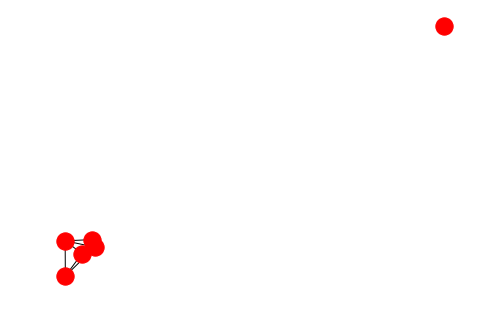

In [229]:
induced_pre_G = community.induced_graph(pre_cluster, pre_wG)
nx.draw(induced_pre_G)
print(nx.info(induced_pre_G))

Name: 
Type: Graph
Number of nodes: 9
Number of edges: 34
Average degree:   7.5556


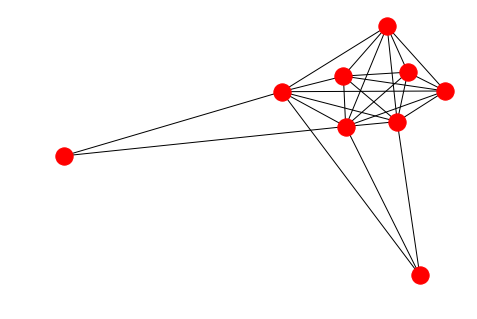

In [230]:
induced_post_G = community.induced_graph(post_cluster, post_wG)
nx.draw(induced_post_G)
print(nx.info(induced_post_G))

In [231]:
#pre_OTUID, post_OTUID, format: {vertex : OTUID}

#format : {cluster_number: [v1, v2, ..., vn]} (note that each vertex is represented by id not OTUID)
pre_cluster_tn = defaultdict(list)
for v, c in pre_cluster.items():
    pre_cluster_tn[c].append(v)

post_cluster_tn = defaultdict(list)
for v, c in post_cluster.items():
    post_cluster_tn[c].append(v)

pre_list = list()  
post_list = list()

subgroup_louvain = []

for c1, v1 in pre_cluster_tn.items():
    for v in v1:
            pre_list.append(pre_OTUID[v])
    for c2, v2 in post_cluster_tn.items():
        print("pre-network cluster # {} & post-network cluster # {}".format(c1, c2))
        for v in v2:
            post_list.append(post_OTUID[v])
        common = list(set(pre_list).intersection(post_list))
        print("number of common OTU: {}".format(len(common)))
        
        if(len(common) >= 8):
            subgroup_louvain.append(common)
        
        print("-------------------------------------")

        post_list = list()
    pre_list = list()


pre-network cluster # 0 & post-network cluster # 0
number of common OTU: 1
-------------------------------------
pre-network cluster # 0 & post-network cluster # 1
number of common OTU: 0
-------------------------------------
pre-network cluster # 0 & post-network cluster # 2
number of common OTU: 0
-------------------------------------
pre-network cluster # 0 & post-network cluster # 3
number of common OTU: 9
-------------------------------------
pre-network cluster # 0 & post-network cluster # 4
number of common OTU: 29
-------------------------------------
pre-network cluster # 0 & post-network cluster # 5
number of common OTU: 4
-------------------------------------
pre-network cluster # 0 & post-network cluster # 6
number of common OTU: 0
-------------------------------------
pre-network cluster # 0 & post-network cluster # 7
number of common OTU: 1
-------------------------------------
pre-network cluster # 0 & post-network cluster # 8
number of common OTU: 0
--------------------

In [247]:
#format {kingdom : {k1: count1, k2: count 2, ...}, phylum:{ p1: count1, ...}...}, 
tax = defaultdict(lambda: defaultdict(lambda: 0))

for i in subgroup_louvain:
    print(len(i))
print("-----------")

# kingdom
# phylum
# class
# order
# family
# genus
# specie
# lasttaxa
n = 7
print(len(subgroup_louvain[n]))
print(subgroup_louvain[n])

for otu in subgroup_louvain[n]:
    tax["kingdom"][OTU_info[otu]["kingdom"]] += 1
    tax["phylum"][OTU_info[otu]["phylum"]] += 1
    tax["class"][OTU_info[otu]["class"]] += 1
    tax["order"][OTU_info[otu]["order"]] += 1
    tax["family"][OTU_info[otu]["family"]] += 1
    tax["genus"][OTU_info[otu]["genus"]] += 1
    tax["specie"][OTU_info[otu]["specie"]] += 1
    tax["lasttaxa"][OTU_info[otu]["lasttaxa"]] += 1



for t, lst in tax.items():
    print(t)
    for a, b in lst.items():
        print("{} : {}".format(a, b))
    print("---------------")

9
29
22
43
8
17
21
16
-----------
16
['1082059', '823476', '829814', '543151', '209511', '156357', '830290', '27938', '4342113', '548576', '1101488', 'New.0.ReferenceOTU411', '894928', '589792', 'New.0.ReferenceOTU100', '580411']
kingdom
k__Bacteria : 16
---------------
genus
g__Gramella : 1
Unknown : 6
g__Paracoccus : 1
g__Loktanella : 1
g__Moraxella : 1
g__Pseudoalteromonas : 1
g__Acinetobacter : 1
g__Alteromonas : 1
g__Psychrobacter : 3
---------------
lasttaxa
f__Comamonadaceae : 1
g__Paracoccus : 1
g__Moraxella : 1
g__Acinetobacter : 1
o__Sphingomonadales : 1
f__[Weeksellaceae] : 1
g__Gramella : 1
g__Psychrobacter : 1
f__Moraxellaceae : 2
f__Lachnospiraceae : 1
g__Pseudoalteromonas : 1
g__Loktanella : 1
g__Alteromonas : 1
s__pacificensis : 2
---------------
phylum
p__Proteobacteria : 13
p__Firmicutes : 1
p__Bacteroidetes : 2
---------------
order
o__Clostridiales : 1
o__Flavobacteriales : 2
o__Rhodobacterales : 2
o__Alteromonadales : 1
o__Vibrionales : 1
o__Sphingomonadales : 1
o_

In [249]:
taxonomy = ["kingdom", "phylum", "class", "order", "family", "genus", "specie", "lasttaxa"] 
f = open("groups_info.txt", 'w')
for i, l in enumerate(subgroup_louvain):
    f.write("Group: {}\n".format(i+1))
    f.write("OTUID\tkingdom\tphylum\tclass\torder\tfamily\tgenus\tspecie\tlasttaxa \n")
    for otu in l:
        f.write("{}\t".format(otu))
        for t in taxonomy:
            f.write("{}\t".format(OTU_info[otu][t]))
        f.write('\n')

In [17]:
#clusters' sizes
for c, v in pre_cluster_tn.items():
    print(c, len(v), sep = ": ")
print("--------------------------------")
for c, v in post_cluster_tn.items():
    print(c, len(v), sep = ": ")

0: 114
1: 45
2: 49
3: 88
4: 59
5: 2
--------------------------------
0: 38
1: 57
2: 9
3: 35
4: 34
5: 36
6: 30
7: 8
8: 9


<center><h2>Clauset-Newman-Moore'a Algorithm (Modularity Optimization)</h2></center>

__pre-network:__ 
`8 clusters`

<img src="jupyter _network _images/newman_pre_size.png">

__post-network:__ 
`9 clusters`

<img src="jupyter _network _images/newman_post_size.png">

<center><h3>Cluste-level Comparsion </h3></center>

<img src="jupyter _network _images/table2.png">

In [128]:
# format: [community : (v1, v2, ..., vn)]
pre_cluster = greedy_modularity_communities(pre_wG)
print(len(pre_cluster)) # 8

post_cluster = greedy_modularity_communities(post_wG)
print(len(post_cluster)) # 9

8
9


In [129]:
for c, v in enumerate(pre_cluster):
    print(c, len(v), sep = ' : ')
    
print("---------------------")

for c, v in enumerate(post_cluster):
    print(c, len(v), sep = ' : ')

0 : 107
1 : 72
2 : 65
3 : 61
4 : 44
5 : 5
6 : 2
7 : 1
---------------------
0 : 55
1 : 53
2 : 51
3 : 46
4 : 30
5 : 10
6 : 5
7 : 3
8 : 3


In [130]:
#pre_OTUID, post_OTUID, format: {vertex : OTUID}

pre_list = list()  
post_list = list()

subgroup_clauset = []

for c1, v1 in enumerate(pre_cluster):
    for v in v1:
        pre_list.append(pre_OTUID[v])
    for c2, v2 in enumerate(post_cluster):
        print("pre-network cluster # {} & post-network cluster # {}".format(c1, c2))
        for v in v2:
            post_list.append(post_OTUID[v])
        common = list(set(pre_list).intersection(post_list))
        print("number of common OTU: {}".format(len(common)))
        print("-------------------------------------")
        
        if len(common) >= 8:
            subgroup_clauset.append(common)
        
        post_list = list()
    pre_list = list()

pre-network cluster # 0 & post-network cluster # 0
number of common OTU: 42
-------------------------------------
pre-network cluster # 0 & post-network cluster # 1
number of common OTU: 8
-------------------------------------
pre-network cluster # 0 & post-network cluster # 2
number of common OTU: 11
-------------------------------------
pre-network cluster # 0 & post-network cluster # 3
number of common OTU: 25
-------------------------------------
pre-network cluster # 0 & post-network cluster # 4
number of common OTU: 0
-------------------------------------
pre-network cluster # 0 & post-network cluster # 5
number of common OTU: 3
-------------------------------------
pre-network cluster # 0 & post-network cluster # 6
number of common OTU: 1
-------------------------------------
pre-network cluster # 0 & post-network cluster # 7
number of common OTU: 0
-------------------------------------
pre-network cluster # 0 & post-network cluster # 8
number of common OTU: 1
------------------

In [131]:
for c in subgroup_clauset:
    print("{} : ".format(len(c)))
    print(c)
    print("------------------")

42 : 
['712677', 'New.0.CleanUp.ReferenceOTU19193', 'New.0.CleanUp.ReferenceOTU1621', '768553', 'New.0.CleanUp.ReferenceOTU125389', '351979', 'New.1.ReferenceOTU260', 'New.0.CleanUp.ReferenceOTU50341', '609982', '1111294', 'New.0.ReferenceOTU179', 'New.1.ReferenceOTU183', 'New.0.CleanUp.ReferenceOTU15269', 'New.0.CleanUp.ReferenceOTU116380', '308081', 'New.0.CleanUp.ReferenceOTU104626', '540982', '334459', 'New.0.ReferenceOTU745', '4385756', 'New.0.CleanUp.ReferenceOTU43340', '364926', '359750', 'New.0.CleanUp.ReferenceOTU138349', '533373', '551969', '291844', '262095', 'New.0.CleanUp.ReferenceOTU22635', 'New.0.CleanUp.ReferenceOTU108577', '902334', '308309', '535375', '820978', '1654477', '529652', '572889', '337083', '583656', '367535', '828483', 'New.0.CleanUp.ReferenceOTU111477']
------------------
8 : 
['351976', '544313', '528421', '941487', 'New.0.CleanUp.ReferenceOTU38474', '9510', '792393', '160015']
------------------
11 : 
['132837', 'New.0.ReferenceOTU138', '590218', '54468

In [67]:
for l1 in subgroup_louvain:
    print("louvain group, length {}".format(len(l1)))
    for l2 in subgroup_clauset:
        common = list(set(l1).intersection(l2))
        print("clauset group, length {},common: {}".format(len(l2), len(common)))

louvain group, length 29
clauset group, length 42,common: 0
clauset group, length 8,common: 0
clauset group, length 11,common: 0
clauset group, length 25,common: 0
clauset group, length 17,common: 0
clauset group, length 21,common: 13
clauset group, length 9,common: 0
clauset group, length 22,common: 0
clauset group, length 15,common: 13
louvain group, length 22
clauset group, length 42,common: 0
clauset group, length 8,common: 0
clauset group, length 11,common: 0
clauset group, length 25,common: 0
clauset group, length 17,common: 0
clauset group, length 21,common: 0
clauset group, length 9,common: 0
clauset group, length 22,common: 22
clauset group, length 15,common: 0
louvain group, length 43
clauset group, length 42,common: 40
clauset group, length 8,common: 0
clauset group, length 11,common: 0
clauset group, length 25,common: 0
clauset group, length 17,common: 0
clauset group, length 21,common: 0
clauset group, length 9,common: 0
clauset group, length 22,common: 0
clauset group, le

<center><h2>Cordasco & Gargano's Label propagation </h2></center>

__pre_network:__
`15 clusters`

<img src="jupyter _network _images/label_pre_size.png">

__post_network:__
`13 clusters`

<img src="jupyter _network _images/label_post_size.png">

<center><h2>Cluster-level comparison</h2></center>

<img src="jupyter _network _images/label.png">

In [78]:
pre_cluster = list(label_propagation_communities(pre_wG))
print(len(pre_cluster))

print("------------------------------------------")

post_cluster = list(label_propagation_communities(post_wG))
print(len(post_cluster))

15
------------------------------------------
13


In [79]:
for c, v in enumerate(pre_cluster):
    print(c, len(v), sep = " : ")

print("----------------------------------------")
    
for c, v in enumerate(post_cluster):
    print(c, len(v), sep = " : ")

0 : 51
1 : 3
2 : 137
3 : 3
4 : 13
5 : 12
6 : 4
7 : 5
8 : 33
9 : 2
10 : 10
11 : 6
12 : 17
13 : 40
14 : 21
----------------------------------------
0 : 6
1 : 27
2 : 18
3 : 7
4 : 5
5 : 4
6 : 16
7 : 44
8 : 9
9 : 20
10 : 24
11 : 3
12 : 73


In [80]:
#pre_OTUID, post_OTUID, format: {vertex : OTUID}

pre_list = list()  
post_list = list()
subgroup_label_prop = []

for c1, v1 in enumerate(pre_cluster):
    for v in v1:
            pre_list.append(pre_OTUID[v])
    for c2, v2 in enumerate(post_cluster):
        print("pre-network cluster # {} & post-network cluster # {}".format(c1, c2))
        for v in v2:
            post_list.append(post_OTUID[v])
        common = list(set(pre_list).intersection(post_list))
        print("number of common OTU: {}".format(len(common)))
        print(common)
        
        if len(common) >= 8:
            subgroup_label_prop.append(common)
        
        print("-------------------------------------")
        post_list = list()
    pre_list = list()

pre-network cluster # 0 & post-network cluster # 0
number of common OTU: 2
['269774', 'New.0.CleanUp.ReferenceOTU38474']
-------------------------------------
pre-network cluster # 0 & post-network cluster # 1
number of common OTU: 16
['830290', '580411', '543151', '589792', '27938', '1082059', '823476', '209511', '894928', '740871', '829814', '4342113', '548576', 'New.0.ReferenceOTU411', 'New.0.ReferenceOTU100', '1101488']
-------------------------------------
pre-network cluster # 0 & post-network cluster # 2
number of common OTU: 0
[]
-------------------------------------
pre-network cluster # 0 & post-network cluster # 3
number of common OTU: 4
['New.0.ReferenceOTU384', '989870', '179845', 'New.0.ReferenceOTU369']
-------------------------------------
pre-network cluster # 0 & post-network cluster # 4
number of common OTU: 0
[]
-------------------------------------
pre-network cluster # 0 & post-network cluster # 5
number of common OTU: 0
[]
-------------------------------------
pr

In [86]:
#print(len(subgroup_clauset)) #9
#print(len(subgroup_label_prop)) #6
#print(len(subgroups_louvain)) #8

# for i1, group1 in enumerate(subgroups_louvain):
#     for i2, group2 in enumerate(subgroup_clauset):
#         print("{} vs {} with length {} and {}".format(i1, i2, len(group1), len(group2)))
#         common = list(set(group1).intersection(group2))
#         print(len(common))
#         print("---------------------------------")
        

In [61]:
pre_G = ig.read(pre_fname, format="gml")
post_G = ig.read(post_fname, format="gml")

<center><h2>Rosvall & Carl's Infomap</h2></center>
<center><b>paper:</b> <i>Maps of information flow reveal community structure in complex networks</i></center>

__pre-network:__
`17 clusters`

__post-network:__
`19 clusters`

In [90]:
pre_cluster = pre_G.community_infomap()
post_cluster = post_G.community_infomap()

print(len(pre_cluster))
print(len(post_cluster))

17
20


In [91]:
#pre_OTUID, post_OTUID, format: {vertex : OTUID}

pre_list = list()  
post_list = list()
subgroup_infomap = []

for c1, v1 in enumerate(pre_cluster):
    for v in v1:
            pre_list.append(pre_OTUID[v])
    for c2, v2 in enumerate(post_cluster):
        print("pre-network cluster # {} & post-network cluster # {}".format(c1, c2))
        for v in v2:
            post_list.append(post_OTUID[v])
        common = list(set(pre_list).intersection(post_list))
        print("number of common OTU: {}".format(len(common)))
        print(common)
        
        if len(common) >= 8:
            subgroup_infomap.append(common)
        
        print("-------------------------------------")
        post_list = list()
    pre_list = list()

pre-network cluster # 0 & post-network cluster # 0
number of common OTU: 2
['580625', '1108960']
-------------------------------------
pre-network cluster # 0 & post-network cluster # 1
number of common OTU: 29
['1084157', '1002005', '687940', '542066', '988314', '984831', '1083508', 'New.3.ReferenceOTU105', '1074210', '574655', '585419', '814277', '1084865', '435928', '1003206', '667570', '1084952', '1097359', '1083194', '579608', 'New.3.ReferenceOTU478', '968954', '1088305', '276149', '922761', '1101451', '441265', '865469', '1047041']
-------------------------------------
pre-network cluster # 0 & post-network cluster # 2
number of common OTU: 0
[]
-------------------------------------
pre-network cluster # 0 & post-network cluster # 3
number of common OTU: 0
[]
-------------------------------------
pre-network cluster # 0 & post-network cluster # 4
number of common OTU: 0
[]
-------------------------------------
pre-network cluster # 0 & post-network cluster # 5
number of common OT

<center><h2>Pons and Latapy's random walk</h2></center>
<center><b>paper:</b> <i>Computing communities in large networks using random walks</i></center>

__pre-network:__
`14 clusters`

__post-network:__
`12 clusters`

In [92]:
pre_cluster = pre_G.community_walktrap().as_clustering()
post_cluster = post_G.community_walktrap().as_clustering()

print(len(pre_cluster))
print(len(post_cluster))

14
12


In [93]:
#pre_OTUID, post_OTUID, format: {vertex : OTUID}

pre_list = list()  
post_list = list()
subgroup_walk = []

for c1, v1 in enumerate(pre_cluster):
    for v in v1:
            pre_list.append(pre_OTUID[v])
    for c2, v2 in enumerate(post_cluster):
        print("pre-network cluster # {} & post-network cluster # {}".format(c1, c2))
        for v in v2:
            post_list.append(post_OTUID[v])
        common = list(set(pre_list).intersection(post_list))
        print("number of common OTU: {}".format(len(common)))
        print(common)
        
        if len(common) >= 8:
            subgroup_walk.append(common)
        
        print("-------------------------------------")
        post_list = list()
    pre_list = list()

pre-network cluster # 0 & post-network cluster # 0
number of common OTU: 1
['580625']
-------------------------------------
pre-network cluster # 0 & post-network cluster # 1
number of common OTU: 0
[]
-------------------------------------
pre-network cluster # 0 & post-network cluster # 2
number of common OTU: 2
['547396', '818181']
-------------------------------------
pre-network cluster # 0 & post-network cluster # 3
number of common OTU: 0
[]
-------------------------------------
pre-network cluster # 0 & post-network cluster # 4
number of common OTU: 41
['1084157', '1002005', '687940', '1060029', '990864', '1108289', '988314', '984831', '1083508', 'New.3.ReferenceOTU105', '1074210', '574655', '829851', '585419', '814277', '1108960', '1099914', '1084865', '836783', '435928', '1003206', '667570', '933546', '1084952', '1097359', '1083194', '579608', '1047041', 'New.3.ReferenceOTU478', '974121', '968954', '813945', '1088305', '646549', '276149', '1033018', '922761', '1101451', '44126

<center><h1>Probabilistic Fuzzy Clustering</h1></center>

It turns out that this dataset is pretty fuzzy with Dunn's coefficient close to `1/k`.

In [197]:
import skfuzzy as fuzz
import numpy as np
import scipy as sp
import networkx as nx
from collections import defaultdict

In [199]:
'''
fuzz.cluster.cmeans(data, k, m, stopping = 0.005, maxiter, init=None)
Returns: 
    cluster_centers (2d array, Data for each center along each feature provided for every cluster)
    fuzzy c-partitioned matrix, 
    Initial guess at fuzzy c-partitioned matrix, 
    Final Euclidian distance matrix
    Objective function history.
    Number of iterations ran.
    Final fuzzy partition coefficient.
'''


pre_fname='../data/RectumMicrobiome_PrePost/stool_network_pre.gml.txt.network'
post_fname='../data/RectumMicrobiome_PrePost/stool_network_post.gml.txt.network'

pre_wG = nx.read_gml(pre_fname, label='id')
post_wG = nx.read_gml(post_fname, label='id')

pre_adj = nx.to_numpy_matrix(pre_wG)
post_adj = nx.to_numpy_matrix(post_wG)


In [200]:
pre_cntr, pre_u, pre_u0, pre_d, pre_jm, pre_p, pre_fpc = fuzz.cluster.cmeans(pre_adj, 6, 2, error = 0.005, maxiter = 1000, init=None)

post_cntr, post_u, post_u0, post_d, post_jm, post_p, post_fpc = fuzz.cluster.cmeans(post_adj, 9, 2, error = 0.005, maxiter = 1000, init=None)


In [201]:
# Dunn’s partition coefficient
def dunn_pc(u):
    n = u.shape[1]
    return ( np.trace(np.dot(u, np.transpose(u)))/n )

print(dunn_pc(pre_u))

0.1768958783073859


In [202]:
pre_cluster = defaultdict(list)
post_cluster = defaultdict(list)

for i in range(pre_u.shape[0]):
    for j in range(pre_u.shape[1]):
        if pre_u[i, j] > 1/pre_u.shape[0]:
            pre_cluster[i].append(pre_OTUID[j])

for i in range(pre_u.shape[0]):
    print(len(pre_cluster[i]))

print("-----------")
    
for i in range(post_u.shape[0]):
    for j in range(post_u.shape[1]):
        if post_u[i, j] > 1/post_u.shape[0]:
            post_cluster[i].append(post_OTUID[j])

for i in range(post_u.shape[0]):
    print(len(post_cluster[i]))

245
245
245
245
112
245
-----------
53
181
210
213
43
74
181
74
182


<center><h1>Possibilistic Fuzzy Clustering</h1></center>

In [77]:
import cmeans
import networkx as nx

In [78]:
'''
cmeans.pcm(data, k, m, stopping = 0.005, maxiter, init=None)
Returns: 
    cluster_centers (2d array, Data for each center along each feature provided for every cluster)
    initial cluster centers
    final partitioned matrix, 
    initial partition matrix
    Final Euclidian distance matrix
    Number of iterations ran.
'''

pre_fname='../data/RectumMicrobiome_PrePost/stool_network_pre.gml.txt.network'
post_fname='../data/RectumMicrobiome_PrePost/stool_network_post.gml.txt.network'

pre_wG = nx.read_gml(pre_fname, label='id')
post_wG = nx.read_gml(post_fname, label='id')

pre_adj = nx.to_numpy_matrix(pre_wG)
post_adj = nx.to_numpy_matrix(post_wG)

In [79]:
pre_cntr, pre_init_cntr, pre_u, pre_init_u, per_d, pre_i  = cmeans.pcm(pre_adj, 6, 2, e = 0.005, max_iterations = 1000)
post_cntr, post_init_cntr, post_u, post_init_u, post_d, post_i  = cmeans.pcm(post_adj, 9, 2, e = 0.005, max_iterations = 1000)

In [82]:
pre_cluster = defaultdict(list)
post_cluster = defaultdict(list)

for i in range(pre_u.shape[0]):
    for j in range(pre_u.shape[1]):
        if pre_u[i, j] > 1/pre_u.shape[0]:
            pre_cluster[i].append(pre_OTUID[j])

for i in range(pre_u.shape[0]):
    print(len(pre_cluster[i]))

print("-----------")

for i in range(post_u.shape[0]):
    for j in range(post_u.shape[1]):
        if post_u[i, j] > 1/post_u.shape[0]:
            post_cluster[i].append(post_OTUID[j])

for i in range(post_u.shape[0]):
    print(len(post_cluster[i]))



238
238
238
245
238
245
-----------
256
256
256
256
256
256
256
256
256


<center><h1>Latent Dirichlet Allocation</h1></center>

In [31]:
import numpy as np
import lda
import networkx as nx
from collections import defaultdict

In [32]:
pre_fname='../data/RectumMicrobiome_PrePost/stool_network_pre.gml.txt.network'
post_fname='../data/RectumMicrobiome_PrePost/stool_network_post.gml.txt.network'

pre_wG = nx.read_gml(pre_fname, label='id')
post_wG = nx.read_gml(post_fname, label='id')

pre_adj = nx.to_numpy_matrix(pre_wG)
post_adj = nx.to_numpy_matrix(post_wG)

pre_adj = np.array(pre_adj)
post_adj = np.array(post_adj)

pre_OTUID = nx.get_node_attributes(pre_wG,'OTUID') # format: OTUID[vertex_id] = OTUID
post_OTUID = nx.get_node_attributes(post_wG,'OTUID') # format: OTUID[vertex_id] = OTUID


In [33]:
for x in range(0, pre_adj.shape[0]):
    for y in range(0, pre_adj.shape[1]):
        if pre_adj[x,y] > 0:
            pre_adj[x,y] = 1
pre_adj = pre_adj.astype(int)

for x in range(0, post_adj.shape[0]):
    for y in range(0, post_adj.shape[1]):
        if post_adj[x,y] > 0:
            post_adj[x,y] = 1
post_adj = post_adj.astype(int)

In [34]:
model = lda.LDA(n_topics=300, n_iter=2000, random_state=1)

In [35]:
model.fit(pre_adj)

INFO:lda:n_documents: 357
INFO:lda:vocab_size: 357
INFO:lda:n_words: 11210
INFO:lda:n_topics: 300
INFO:lda:n_iter: 2000
INFO:lda:<0> log likelihood: -150325
INFO:lda:<10> log likelihood: -89587
INFO:lda:<20> log likelihood: -88635
INFO:lda:<30> log likelihood: -88153
INFO:lda:<40> log likelihood: -87921
INFO:lda:<50> log likelihood: -87352
INFO:lda:<60> log likelihood: -87509
INFO:lda:<70> log likelihood: -87202
INFO:lda:<80> log likelihood: -87455
INFO:lda:<90> log likelihood: -87505
INFO:lda:<100> log likelihood: -87297
INFO:lda:<110> log likelihood: -87467
INFO:lda:<120> log likelihood: -87411
INFO:lda:<130> log likelihood: -87228
INFO:lda:<140> log likelihood: -87315
INFO:lda:<150> log likelihood: -87734
INFO:lda:<160> log likelihood: -87865
INFO:lda:<170> log likelihood: -87024
INFO:lda:<180> log likelihood: -87457
INFO:lda:<190> log likelihood: -87086
INFO:lda:<200> log likelihood: -87507
INFO:lda:<210> log likelihood: -86951
INFO:lda:<220> log likelihood: -87532
INFO:lda:<230> l

In [16]:
import matplotlib.pyplot as plt

In [37]:
doc_topic = model.doc_topic_

print(doc_topic)

threshold = 0.003333 # the threshold 1/doc_topic.shape[1]

dt = defaultdict(list)

for i in range(doc_topic.shape[0]):
    for j in range(doc_topic.shape[1]):
        if doc_topic[i, j] > threshold:
            dt[j].append(i)
for j, i in dt.items():
    print("{} : {}".format(j, len(i)))
    print(i)

[[0.0010101  0.0010101  0.0010101  ... 0.0010101  0.0010101  0.02121212]
 [0.00102041 0.01122449 0.00102041 ... 0.00102041 0.00102041 0.00102041]
 [0.12909091 0.00181818 0.00181818 ... 0.00181818 0.00181818 0.00181818]
 ...
 [0.001      0.001      0.001      ... 0.001      0.001      0.011     ]
 [0.00217391 0.00217391 0.00217391 ... 0.00217391 0.00217391 0.00217391]
 [0.00113636 0.00113636 0.00113636 ... 0.00113636 0.00113636 0.00113636]]
0 : 36
[2, 5, 8, 16, 24, 39, 50, 64, 82, 101, 110, 121, 127, 130, 142, 146, 163, 176, 186, 188, 190, 192, 199, 218, 240, 249, 260, 263, 267, 275, 286, 292, 298, 307, 320, 321]
1 : 10
[1, 23, 67, 73, 122, 134, 222, 247, 257, 265]
2 : 16
[67, 74, 89, 91, 122, 125, 162, 183, 187, 194, 201, 227, 236, 256, 274, 299]
3 : 22
[0, 4, 14, 55, 65, 67, 79, 80, 84, 107, 120, 122, 133, 145, 158, 161, 174, 185, 227, 266, 268, 274]
4 : 13
[43, 76, 79, 89, 174, 204, 207, 209, 224, 226, 227, 354, 356]
5 : 18
[0, 11, 42, 43, 61, 65, 83, 116, 120, 153, 170, 173, 219, 23

<h3>Another way</h3>

In [7]:
doc_topic = model.doc_topic_

dt = defaultdict(lambda: 0)

threshold = 1/doc_topic.shape[1]

for i in range(0, doc_topic.shape[0]):
    for j in range(0, doc_topic.shape[1]):
        if doc_topic[i, j] > threshold:
            dt[j] += 1

In [8]:
model = lda.LDA(n_topics=300, n_iter=2000, random_state=1)

In [200]:
model.fit(post_adj)

INFO:lda:n_documents: 256
INFO:lda:vocab_size: 256
INFO:lda:n_words: 3578
INFO:lda:n_topics: 300
INFO:lda:n_iter: 2000
INFO:lda:<0> log likelihood: -44453
INFO:lda:<10> log likelihood: -30498
INFO:lda:<20> log likelihood: -30119
INFO:lda:<30> log likelihood: -30178
INFO:lda:<40> log likelihood: -29794
INFO:lda:<50> log likelihood: -29495
INFO:lda:<60> log likelihood: -29432
INFO:lda:<70> log likelihood: -29178
INFO:lda:<80> log likelihood: -28920
INFO:lda:<90> log likelihood: -28803
INFO:lda:<100> log likelihood: -28905
INFO:lda:<110> log likelihood: -29304
INFO:lda:<120> log likelihood: -29045
INFO:lda:<130> log likelihood: -28845
INFO:lda:<140> log likelihood: -28796
INFO:lda:<150> log likelihood: -28538
INFO:lda:<160> log likelihood: -28690
INFO:lda:<170> log likelihood: -29113
INFO:lda:<180> log likelihood: -28476
INFO:lda:<190> log likelihood: -28724
INFO:lda:<200> log likelihood: -28434
INFO:lda:<210> log likelihood: -28392
INFO:lda:<220> log likelihood: -28563
INFO:lda:<230> log